In [ ]:
#检测书法文字
#步骤
#1.读取图片，灰度，二值化处理
#2.侵蚀去噪点
#3.膨胀连接
#4.闭合孔洞
#5.边缘检测
#6.画检测框

In [5]:
import cv2 
import numpy as np 
import matplotlib.pyplot as plt 
#%matplotlib inline
plt.rcParams['figure.dpi']=200

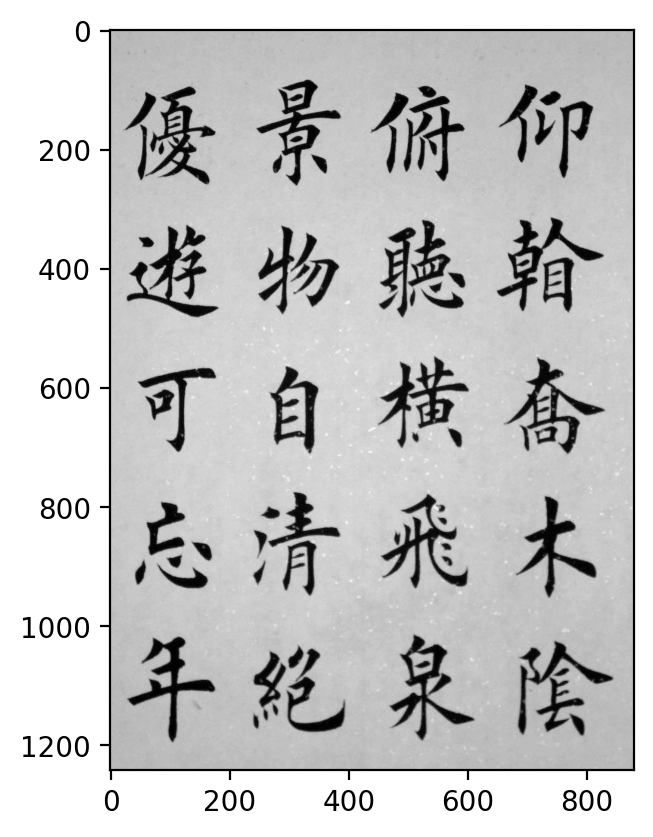

In [6]:
#读取
img = cv2.imread('../test_imgs/shufa.jpg')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
plt.imshow(gray,cmap='gray')

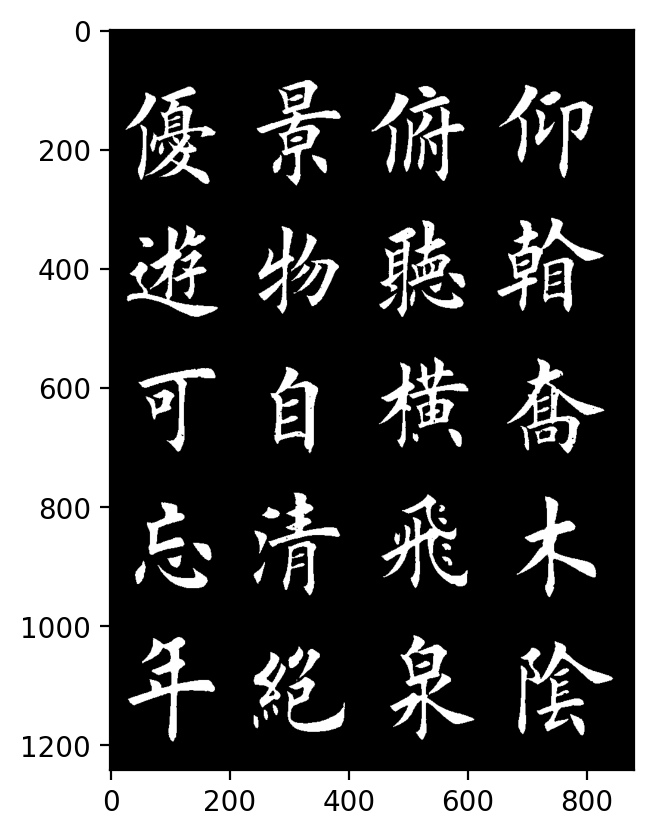

In [8]:
#侵蚀
#需要首先是白色，用到二值化处理
#二值化参数：输入图片，比较阈值，超出阈值被设定的值，模式
#作用，将画面像素与比较阈值对比，小于则设为0（黑色），大于则设为目标值
r,black_img = cv2.threshold(gray,100,255,cv2.THRESH_BINARY_INV)
plt.imshow(black_img,cmap='gray')

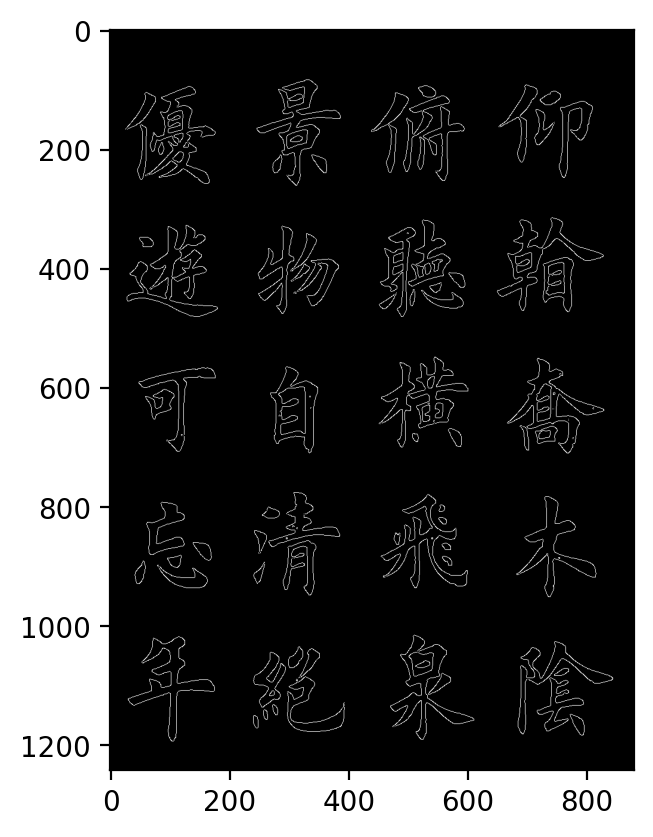

In [9]:
#边缘检测canny
edgs = cv2.Canny(black_img,30,200)
plt.imshow(edgs,cmap='gray')

In [10]:
#画轮廓
contours,h = cv2.findContours(edgs,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE)

In [11]:
img_copy = img.copy()
for c in contours:
    x,y,w,h = cv2.boundingRect(c)
    cv2.rectangle(img_copy,(x,y),(x+w,y+h),(0,255,0),3)

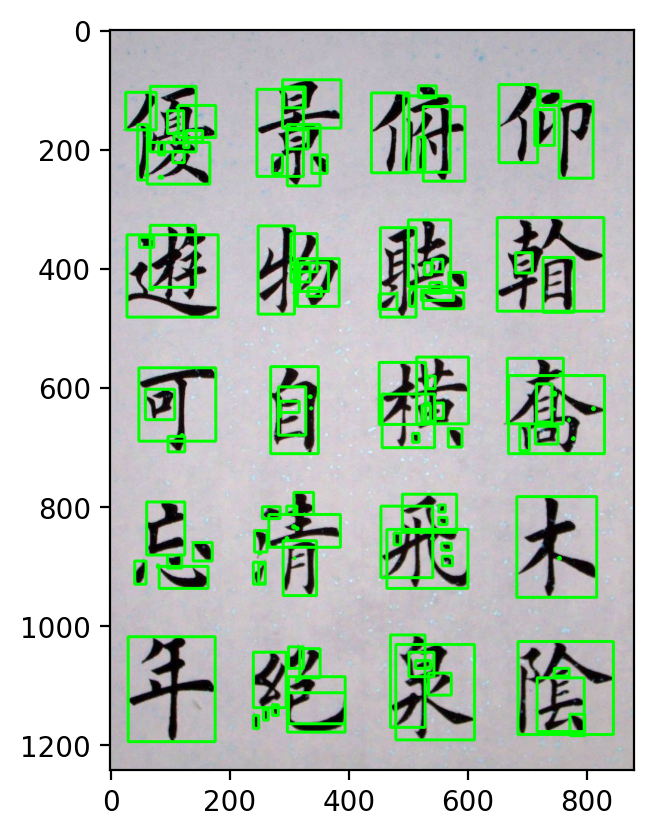

In [12]:
plt.imshow(img_copy)

In [13]:
#形态学变换
#先侵蚀去除噪点
kernel = np.ones((3,3),dtype = np.int8)
erosion1 = cv2.erode(black_img,kernel,iterations=1)

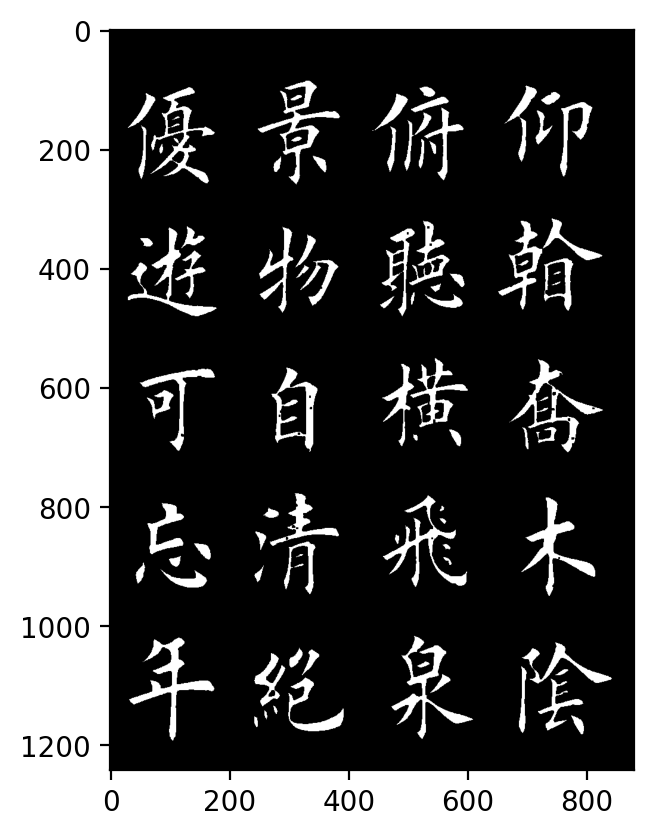

In [14]:
plt.imshow(erosion1,cmap='gray')

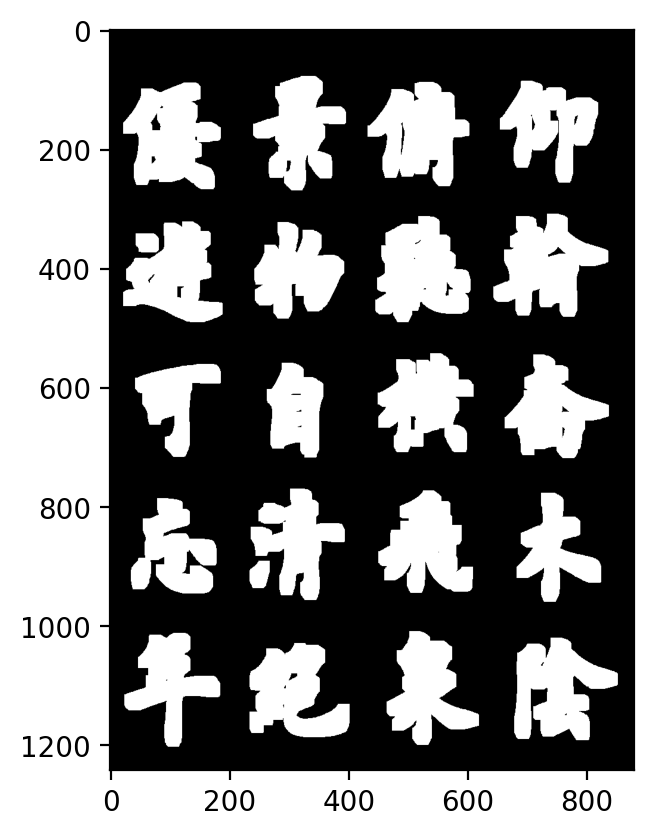

In [16]:
#膨胀连接
kernel = np.ones((10,10),dtype=np.int8)
dilation = cv2.dilate(erosion1,kernel,iterations=2)
plt.imshow(dilation,cmap='gray')

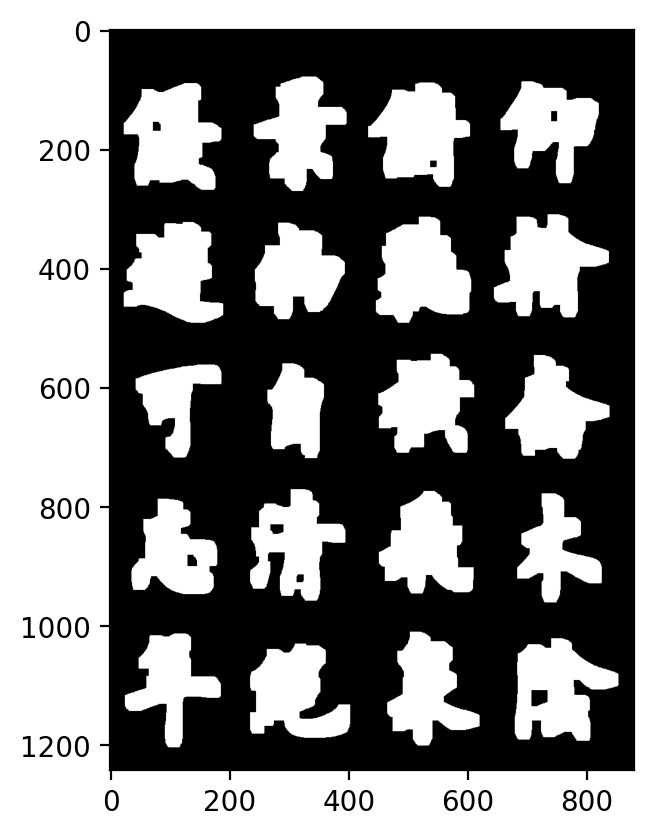

In [17]:
#闭合
kernel = np.ones((10,10),dtype=np.int8)
closing = cv2.morphologyEx(dilation,cv2.MORPH_CLOSE,kernel)
plt.imshow(closing,cmap='gray')

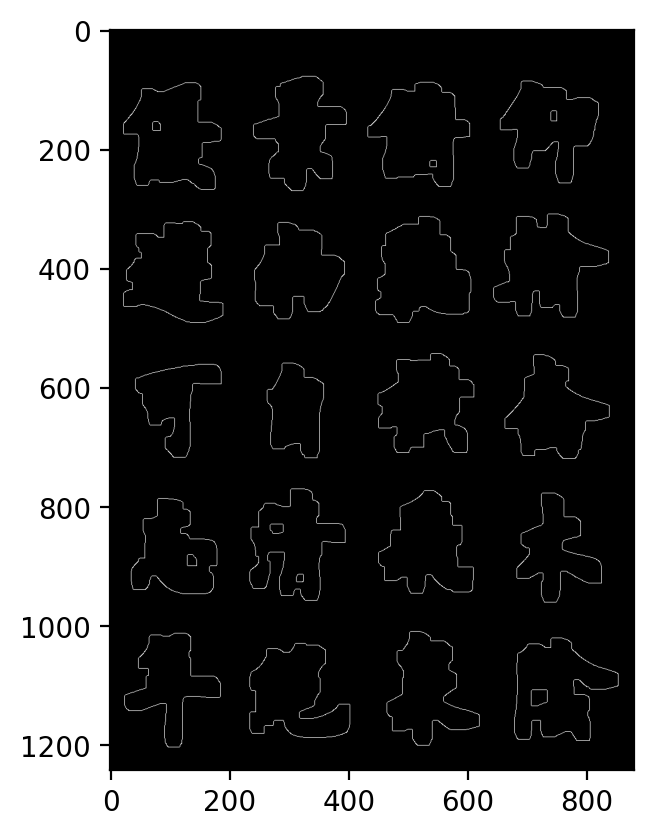

In [20]:
#canny检测
edgs1 = cv2.Canny(closing,30,200)
plt.imshow(edgs1,cmap='gray')

In [25]:
#画轮廓
contours1,h = cv2.findContours(edgs1,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE)

In [29]:
img_copy = img.copy()
for c in contours1:
    x,y,w,h = cv2.boundingRect(c)

    cv2.rectangle(img_copy,(x,y),(x+w,y+h),(0,255,0),3)

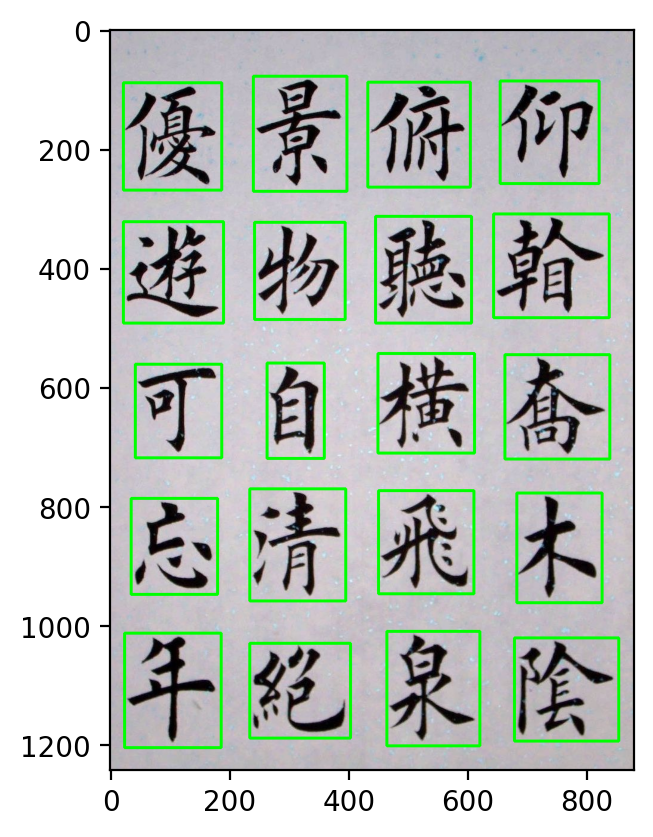

In [30]:
plt.imshow(img_copy)